In [20]:
# check_data.py
from sqlalchemy import create_engine, inspect
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from dotenv import load_dotenv

load_dotenv()

# Connect to the database
user=os.environ.get("MYSQL_USER")
password=os.environ.get("MYSQL_PASSWORD")
host=os.environ.get("MYSQL_HOST")
database=os.environ.get("MYSQL_DATABASE")

engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}/{database}")
inspector = inspect(engine)
table_names = inspector.get_table_names()

#list to hold all dataframes
dfs = []
for table_name in table_names:
    df = pd.read_sql_table(table_name, engine)
    dfs.append(df)
    missing_values = df.isnull().sum()
    # Perform data exploration
    print(df.info)
    #print(df.describe)
    print(f"No. of missing values in table {table_name} is: {missing_values} \n")
    print(df.iloc[:, 1].head(5))


<bound method DataFrame.info of          DATE   ACDGNO
0  2021-02-01  40073.0
1  2021-03-01  40627.0
2  2021-04-01  36863.0
3  2021-05-01  38452.0
4  2021-06-01  38346.0
5  2021-07-01  41295.0
6  2021-08-01  39834.0
7  2021-09-01  38259.0
8  2021-10-01  40040.0
9  2021-11-01  40823.0
10 2021-12-01  42021.0
11 2022-01-01  41200.0
12 2022-02-01  41497.0
13 2022-03-01  43206.0
14 2022-04-01  43202.0
15 2022-05-01  44129.0
16 2022-06-01  45188.0
17 2022-07-01  44667.0
18 2022-08-01  45176.0
19 2022-09-01  46602.0
20 2022-10-01  46484.0
21 2022-11-01  46269.0>
No. of missing values in table ACDGNO is: DATE      0
ACDGNO    0
dtype: int64 

0    40073.0
1    40627.0
2    36863.0
3    38452.0
4    38346.0
Name: ACDGNO, dtype: float64
<bound method DataFrame.info of          DATE  AWHMAN
0  2021-02-01    41.5
1  2021-03-01    41.7
2  2021-04-01    41.6
3  2021-05-01    41.5
4  2021-06-01    41.3
5  2021-07-01    41.5
6  2021-08-01    41.4
7  2021-09-01    41.4
8  2021-10-01    41.3
9  2021-11-

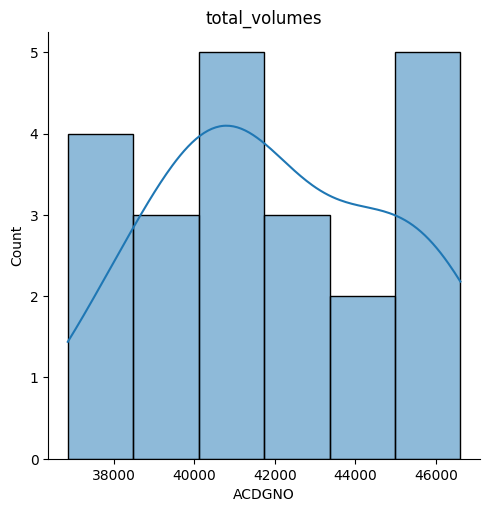

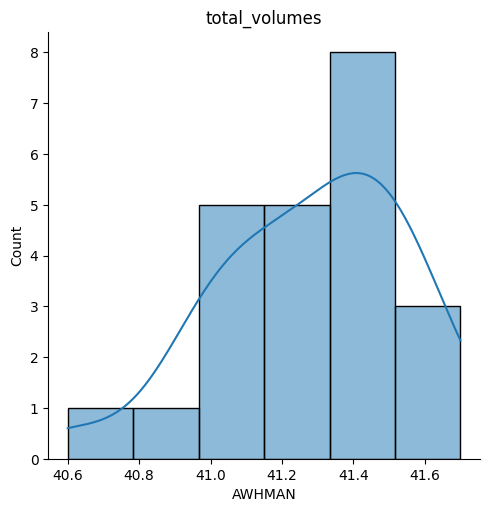

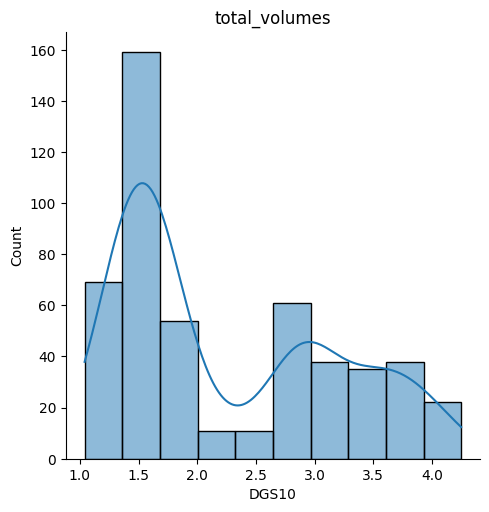

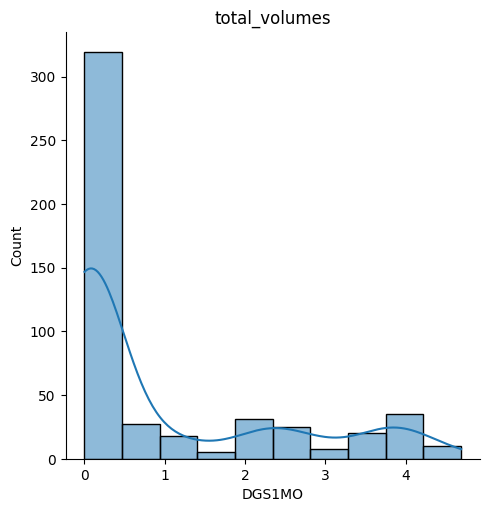

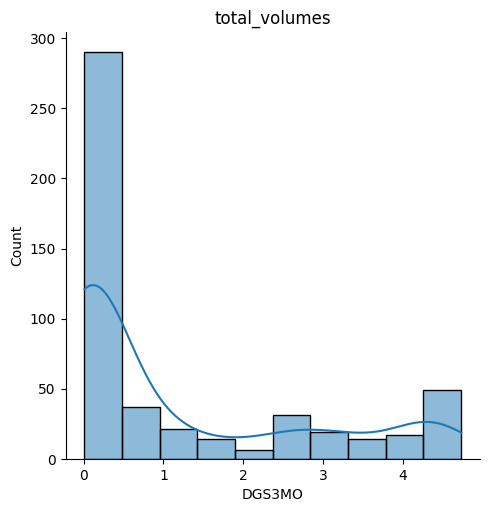

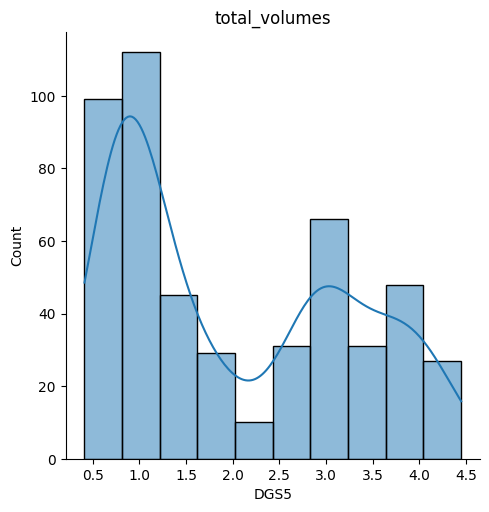

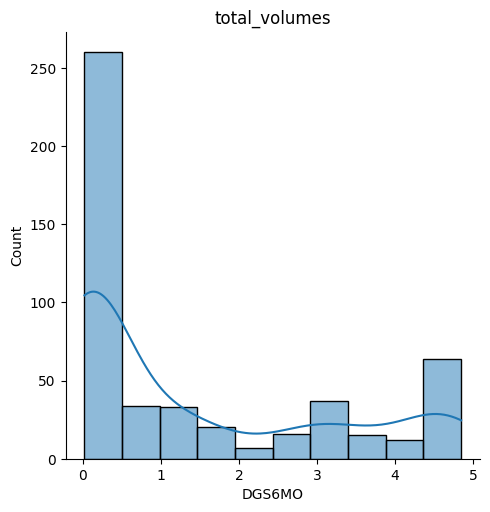

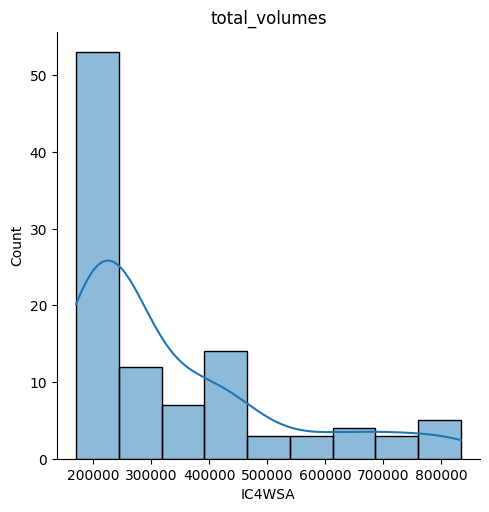

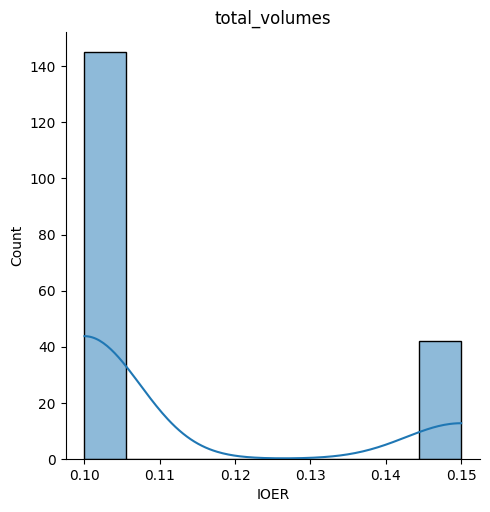

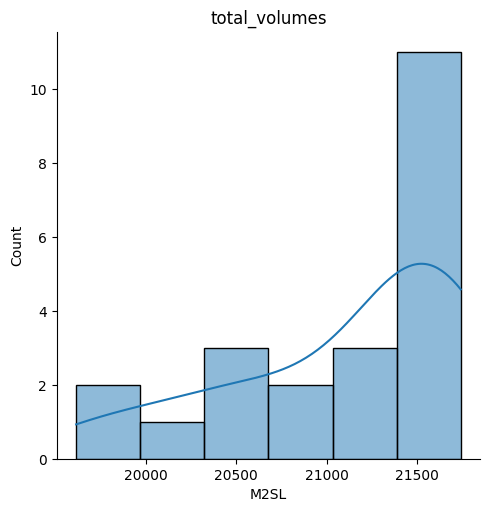

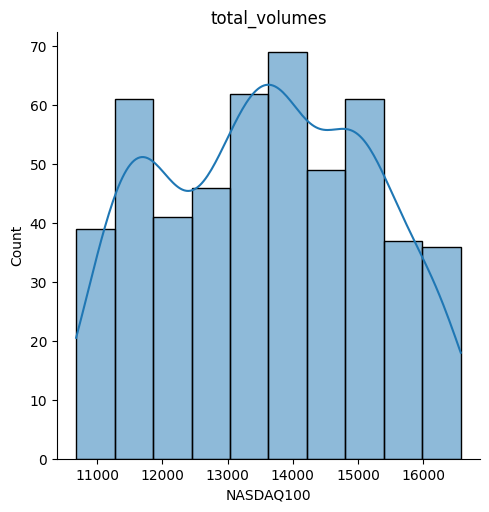

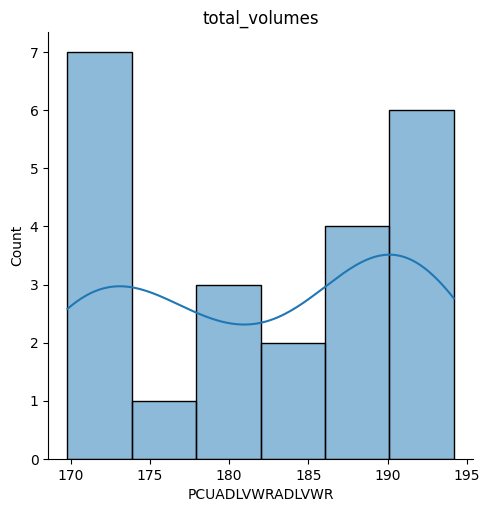

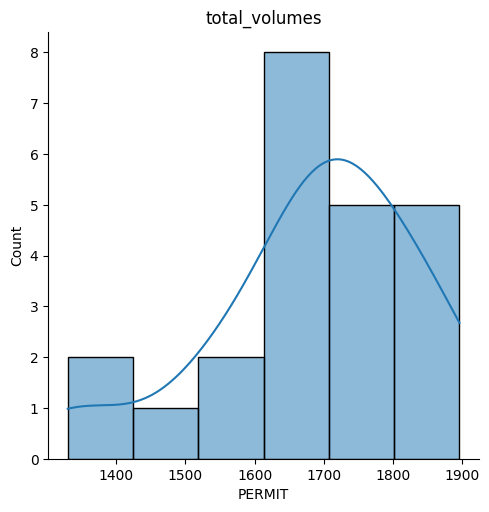

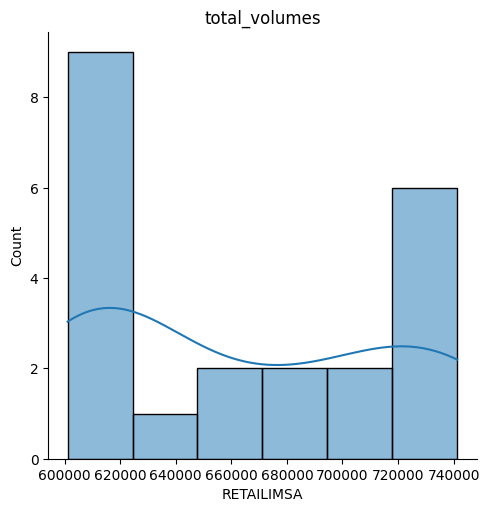

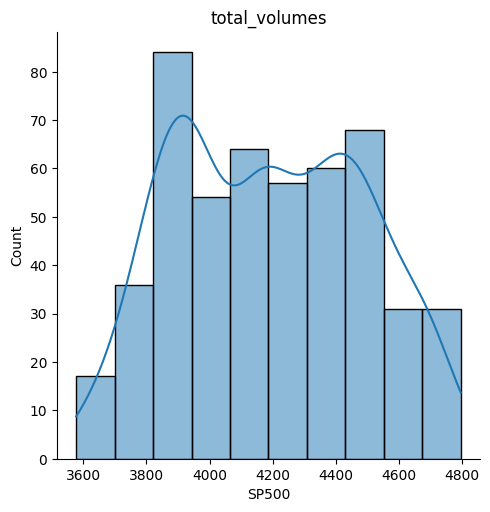

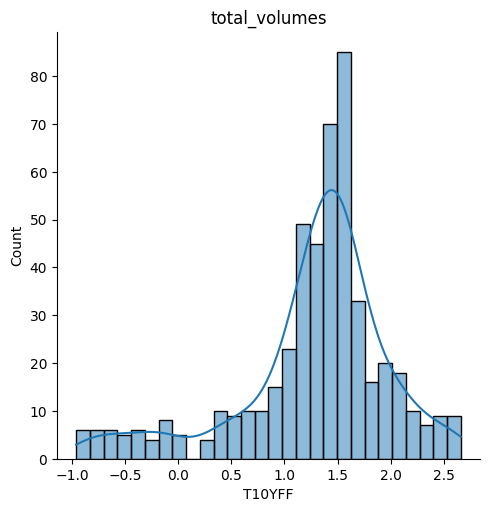

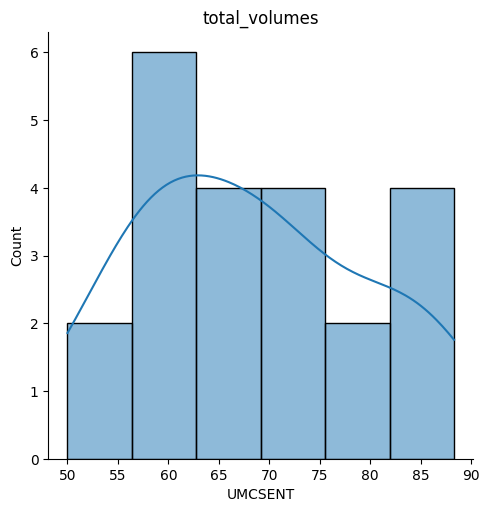

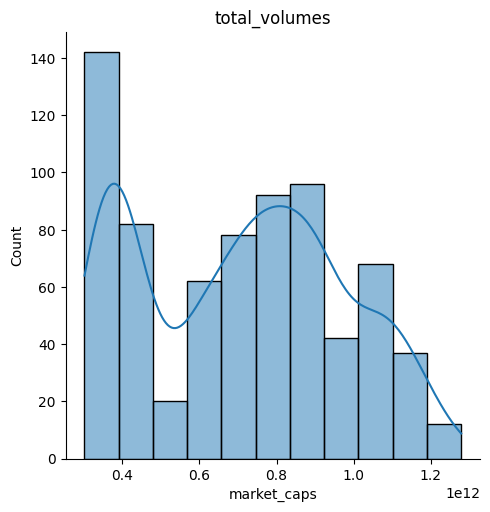

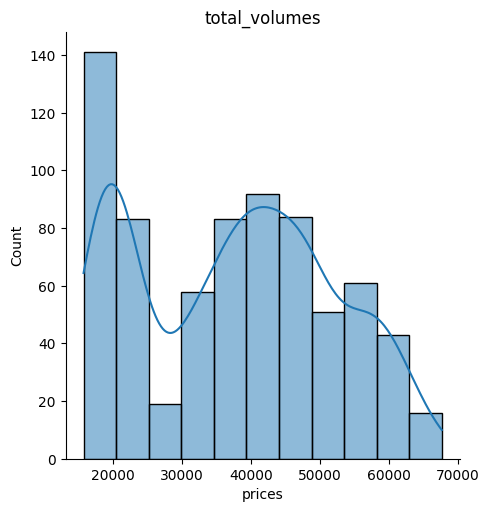

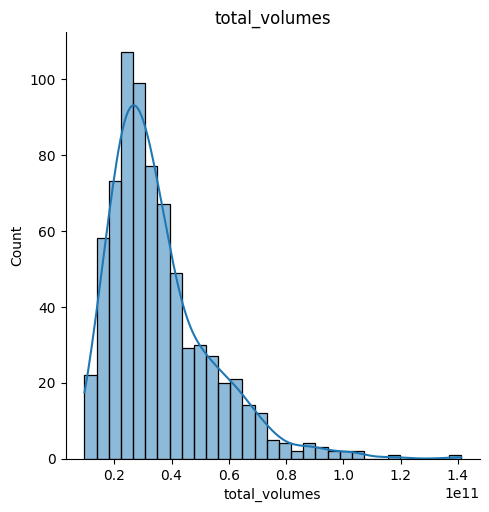

In [21]:
for df in dfs:
    sns.displot(df.iloc[:,1], kde=True)
    plt.title(table_name)
    plt.show()

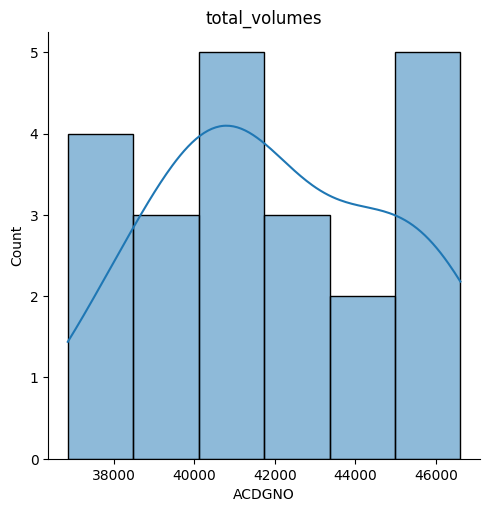

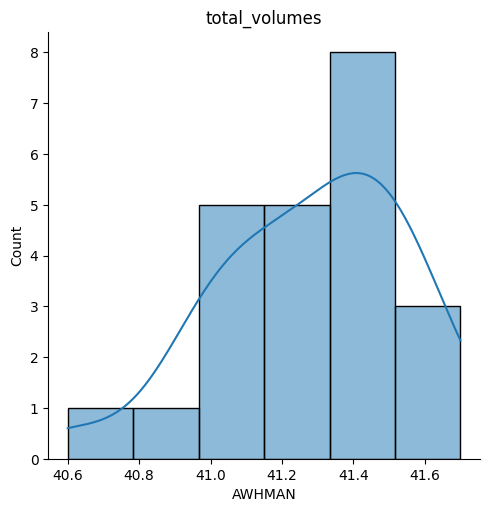

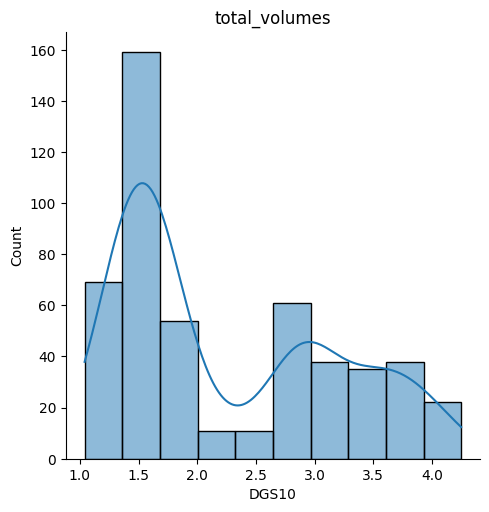

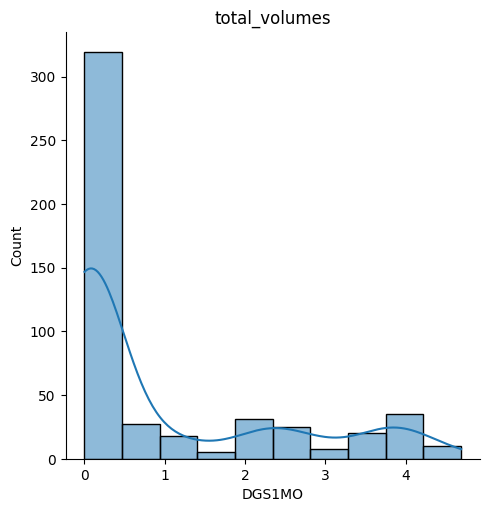

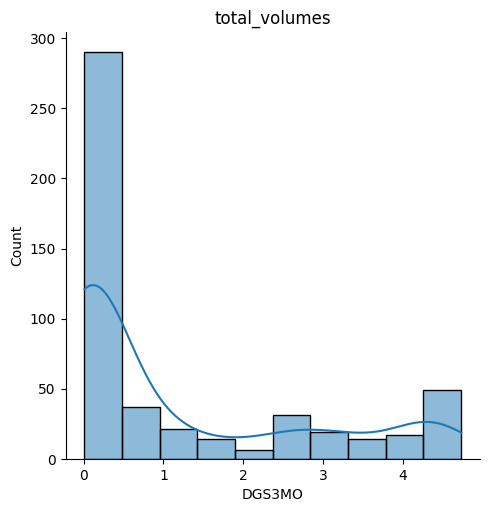

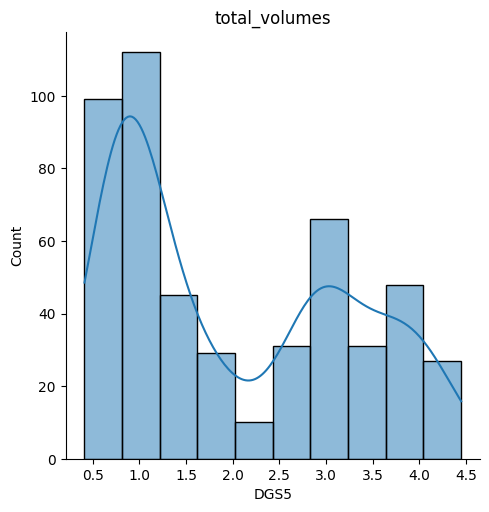

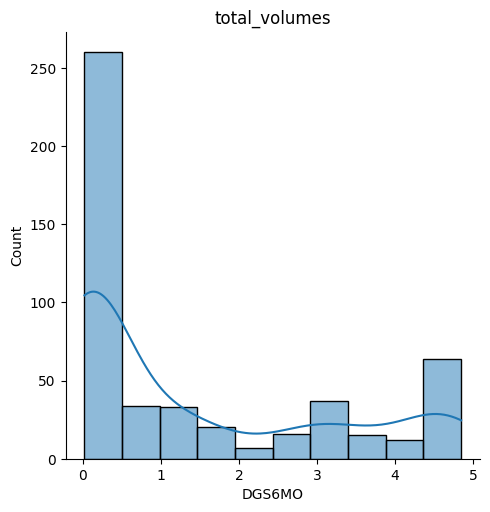

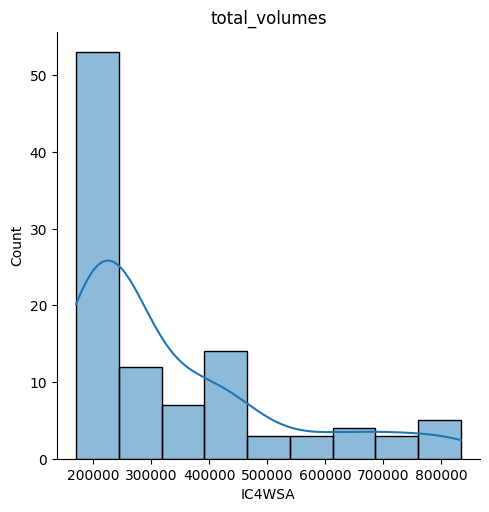

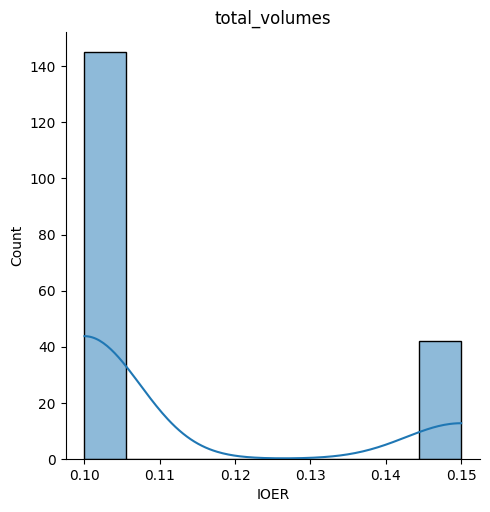

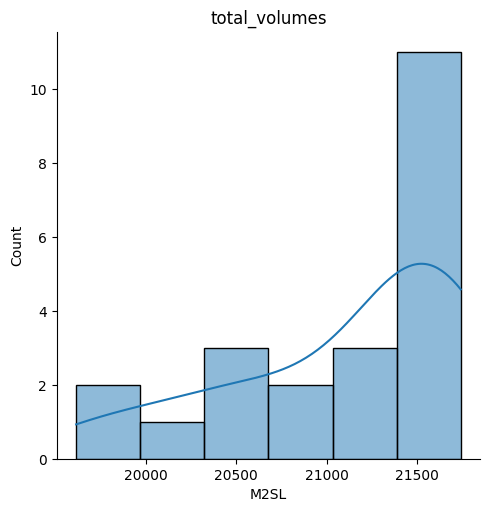

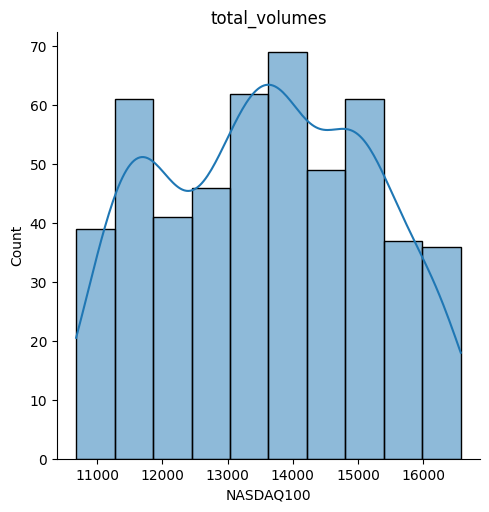

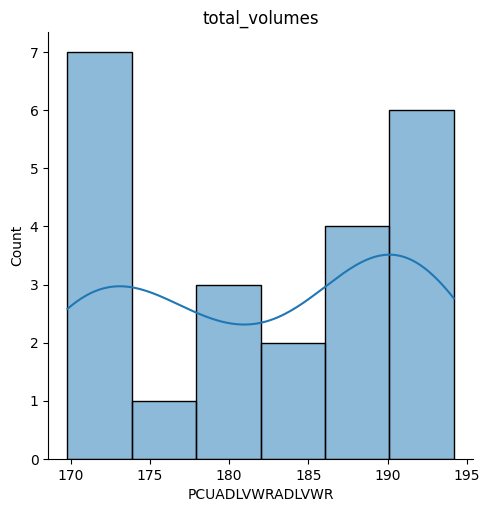

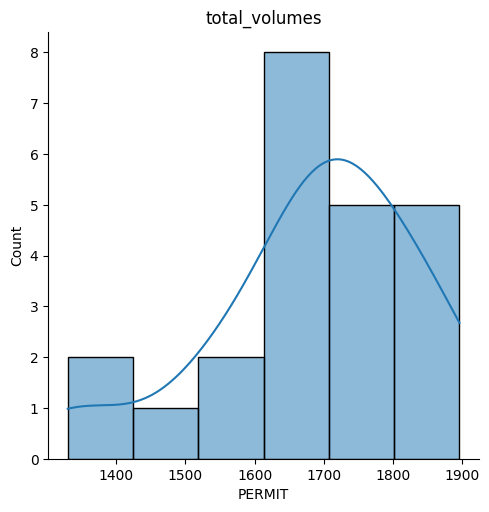

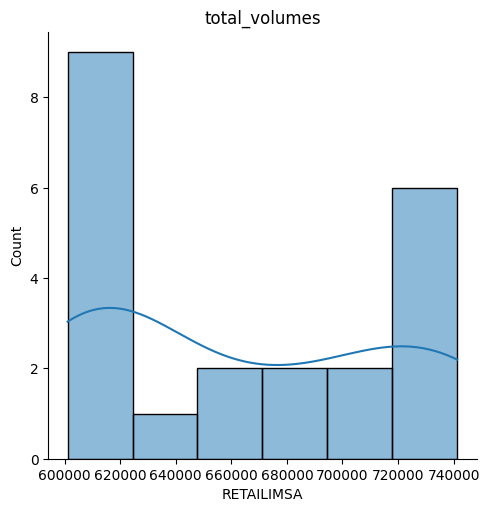

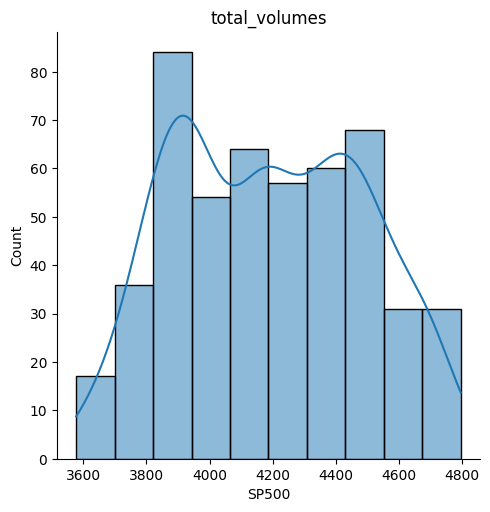

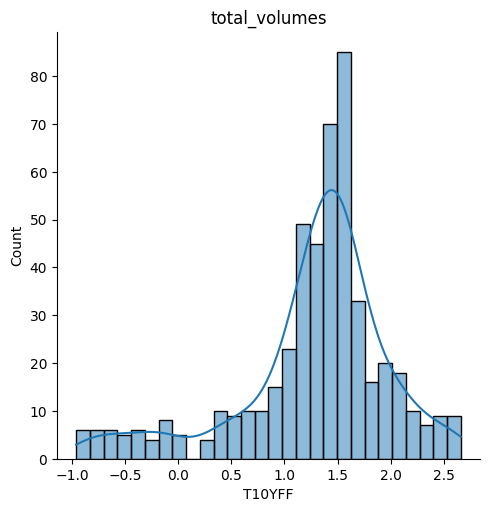

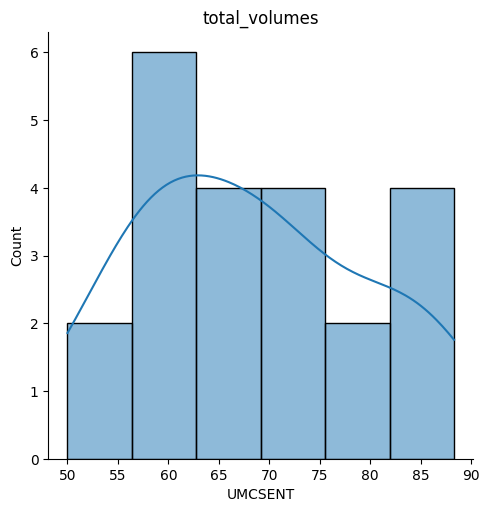

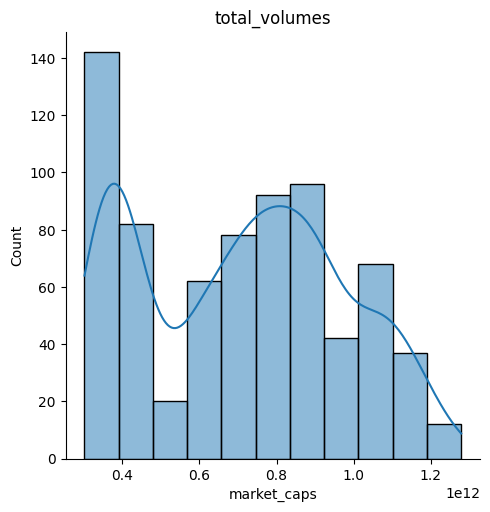

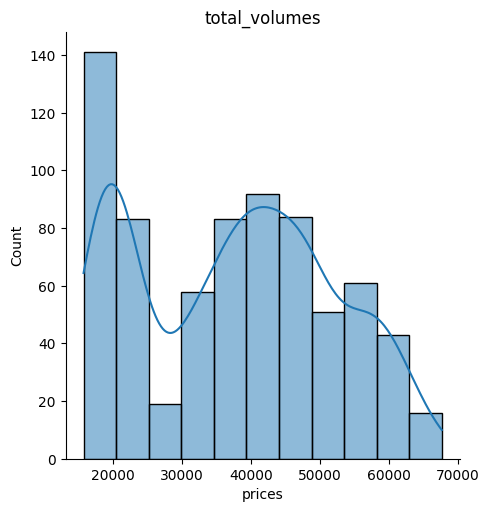

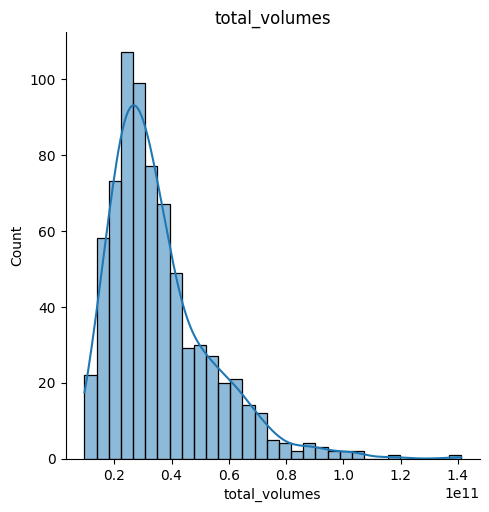

In [22]:
for df in dfs:
    sns.displot(df.iloc[:,1], kde=True)
    plt.title(table_name)
    plt.show()


In [23]:
for table_name in table_names:
    # Filter out missing values
    df = df.dropna()

    # Get IQR for numeric column
    moving_average = df.iloc[:, 1].rolling(window=10).mean()
    # Get IQR for moving average of second column
    Q1 = moving_average.quantile(0.05)
    Q3 = moving_average.quantile(0.95)
    IQR = Q3 - Q1

    # Count number of observations out of 1.5* IQR
    outliers = df.iloc[:, 1][((df.iloc[:, 1] < (Q1 - 1.5 * IQR)) | (df.iloc[:, 1] > (Q3 + 1.5 * IQR)))]
    num_outliers = outliers.shape[0]

    # Count number of observations out of 1.5* IQR
    num_outliers = outliers.shape[0]

    print(f"No. of outlier values in table {table_name} is: {num_outliers} \n")


No. of outlier values in table ACDGNO is: 1 

No. of outlier values in table AWHMAN is: 1 

No. of outlier values in table DGS10 is: 1 

No. of outlier values in table DGS1MO is: 1 

No. of outlier values in table DGS3MO is: 1 

No. of outlier values in table DGS5 is: 1 

No. of outlier values in table DGS6MO is: 1 

No. of outlier values in table IC4WSA is: 1 

No. of outlier values in table IOER is: 1 

No. of outlier values in table M2SL is: 1 

No. of outlier values in table NASDAQ100 is: 1 

No. of outlier values in table PCUADLVWRADLVWR is: 1 

No. of outlier values in table PERMIT is: 1 

No. of outlier values in table RETAILIMSA is: 1 

No. of outlier values in table SP500 is: 1 

No. of outlier values in table T10YFF is: 1 

No. of outlier values in table UMCSENT is: 1 

No. of outlier values in table market_caps is: 1 

No. of outlier values in table prices is: 1 

No. of outlier values in table total_volumes is: 1 

